# <center>Week 6 Forum</center>
<center>Angeline Karen - 2440035601</center>

In [316]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

True value: [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
Prediction:  [1 0 2 1 1 0 1 2 2 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


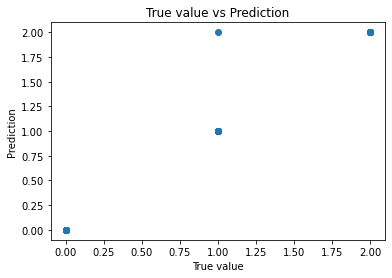

The accuracy score is 0.9736842105263158


In [317]:
# Load iris dataset
iris = datasets.load_iris()

# Create DataFrame
df = pd.DataFrame(data=iris.data)

# .target (target data/the variable we want to predict, in this case are Iris-Setosa, Iris-Versicolour, Iris-Virginica)
# Add 'label' column, and store it with the target data
df["label"] = iris.target

# x: all rows from column "sepal length" & "petal length"
x = df.iloc[:, [1, 3]]

# y: target data
y = df["label"]

# Use the train_test split function from sklearn to 
# split the data arrays into two subsets: for training and testing data using 
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)

# Create a SVM Classifier
svm = SVC(kernel='rbf', random_state=1, gamma=0.1, C=10)

# Fit the SVM model to the input training data
svm.fit(x_train, y_train)

# Predict the response variable in the test dataset
y_pred = svm.predict(x_test)

print("True value:", y_test.ravel())
print("Prediction: ", y_pred.ravel())

# Graph to plot and compare the result of the prediction and the true value
plt.scatter(y_test, y_pred)
plt.xlabel('True value')
plt.ylabel('Prediction')
plt.title("True value vs Prediction")
plt.show()

# Accuracy score
print("The accuracy score is", accuracy_score(y_test, y_pred))

The accuracy score is approximately 97%, which can be stated as an accurate model as it has a good accuracy. Here, I experiment and found that the random_state in train_test_split() function is important. Before I add and specify the random_state in train_test_split(), the accuracy score differs everytime I run. I found that random_state will gurantee the same sequence of random numbers generated everytime I run. If we don't use it, everytime we want to split our datasets, it might get a different set of train and test data points. I also tried to change the random_state in my classifier, though I didn't see any specific change or affect to the model's accuracy score. Moreover, I tried lowering the gamma value in my svm classifier, though it caused the model to overfitting.

In [318]:
# Load the dataset
df = pd.read_csv("./forum/Buy_Computer.csv")

print(df.head())

# The data column we're  going to train and test
features = ["age", "income", "student", "credit_rating"]

# x: features
x = df[features]
# y: target data
y = df["Buy_Computer"]

# get_dummies(): converts categorical data into dummy variables (binary variables)
x = pd.get_dummies(x)

# Use the train_test split function from sklearn to 
# split the data arrays into two subsets: for training and testing data using 
# Here, I specify and split training data to 80% and test data to 30%
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=10)

# Create Decision Tree Classifer object
dtcModel = DecisionTreeClassifier(criterion="entropy")

# Fit the model to the input training data
dtcModel.fit(x_train, y_train)

# Predict the response variable in the test dataset
y_pred = dtcModel.predict(x_test)

print("True value:", y_test.ravel())
print("Prediction: ", y_pred.ravel())

# Accuracy score
print("The accuracy score is" ,accuracy_score(y_test, y_pred))

   id         age  income student credit_rating Buy_Computer
0   1       youth    high      no          fair           no
1   2       youth    high      no     excellent           no
2   3  middle_age    high      no          fair          yes
3   4      senior  medium      no          fair          yes
4   5      senior     low     yes          fair          yes
True value: ['yes' 'no' 'yes' 'yes' 'yes']
Prediction:  ['no' 'no' 'yes' 'yes' 'yes']
The accuracy score is 0.8


The accuracy score is 80%, which is considerate as good accuracy. However, since we only have small datasets, we don't have much information and our estimation cannot be that precise. To get the accuracy reaches 80%, I used 30% data for testing and a random_state of 10. I tried increasing the random_state and set the data for testing to 20%, though the accuracy reaches 1.0 which means the model is overfitting. If I used lower random_state than 10 with setting the data for testing to either 20% ir 30%, it produces an accuracy of around 30% to 40%. I also tried setting the random_state to 10 with the data use for testing is 20%, but the accuracy score is lower than 80% (around 66%). Hence, I believe the best accuracy for this model is 80%.